In [1]:
import pandas as pd

# Load dataset
file_path = r"F:\student_depression_dataset.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [2]:
# Remove the specified columns
df.drop(columns=['id', 'Gender', 'Age', 'City', 'Profession', 'Work Pressure', 'Job Satisfaction', 'Degree'], inplace=True)

# Display updated dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Academic Pressure                      27901 non-null  float64
 1   CGPA                                   27901 non-null  float64
 2   Study Satisfaction                     27901 non-null  float64
 3   Sleep Duration                         27901 non-null  object 
 4   Dietary Habits                         27901 non-null  object 
 5   Have you ever had suicidal thoughts ?  27901 non-null  object 
 6   Work/Study Hours                       27901 non-null  float64
 7   Financial Stress                       27901 non-null  object 
 8   Family History of Mental Illness       27901 non-null  object 
 9   Depression                             27901 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 2.1+ MB
None
   Acade

In [3]:
# Normalize 'Dietary Habits' column
dietary_mapping = {'Healthy': 2, 'Moderate': 1, 'Unhealthy': 0}
df['Dietary Habits'] = df['Dietary Habits'].map(dietary_mapping)

# Verify the changes
print(df['Dietary Habits'].unique())
print(df.head())


[ 2.  1.  0. nan]
   Academic Pressure  CGPA  Study Satisfaction       Sleep Duration  \
0                5.0  8.97                 2.0          '5-6 hours'   
1                2.0  5.90                 5.0          '5-6 hours'   
2                3.0  7.03                 5.0  'Less than 5 hours'   
3                3.0  5.59                 2.0          '7-8 hours'   
4                4.0  8.13                 3.0          '5-6 hours'   

   Dietary Habits Have you ever had suicidal thoughts ?  Work/Study Hours  \
0             2.0                                   Yes               3.0   
1             1.0                                    No               3.0   
2             2.0                                    No               9.0   
3             1.0                                   Yes               4.0   
4             1.0                                   Yes               1.0   

  Financial Stress Family History of Mental Illness  Depression  
0              1.0        

In [4]:
# Normalize binary columns
binary_mapping = {'Yes': 1, 'No': 0}

df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(binary_mapping)
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(binary_mapping)

# Verify the changes
print(df[['Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']].head())


   Family History of Mental Illness  Have you ever had suicidal thoughts ?
0                                 0                                      1
1                                 1                                      0
2                                 1                                      0
3                                 1                                      1
4                                 0                                      1


In [5]:
print(df.head())

   Academic Pressure  CGPA  Study Satisfaction       Sleep Duration  \
0                5.0  8.97                 2.0          '5-6 hours'   
1                2.0  5.90                 5.0          '5-6 hours'   
2                3.0  7.03                 5.0  'Less than 5 hours'   
3                3.0  5.59                 2.0          '7-8 hours'   
4                4.0  8.13                 3.0          '5-6 hours'   

   Dietary Habits  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0             2.0                                      1               3.0   
1             1.0                                      0               3.0   
2             2.0                                      0               9.0   
3             1.0                                      1               4.0   
4             1.0                                      1               1.0   

  Financial Stress  Family History of Mental Illness  Depression  
0              1.0                   

In [6]:
# Remove extra quotes from Sleep Duration
df['Sleep Duration'] = df['Sleep Duration'].str.replace("'", "").str.strip()

# Normalize Sleep Duration
sleep_mapping = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)

# Verify the changes
print(df['Sleep Duration'].unique())
print(df.head())


[ 1.  0.  2.  3. nan]
   Academic Pressure  CGPA  Study Satisfaction  Sleep Duration  \
0                5.0  8.97                 2.0             1.0   
1                2.0  5.90                 5.0             1.0   
2                3.0  7.03                 5.0             0.0   
3                3.0  5.59                 2.0             2.0   
4                4.0  8.13                 3.0             1.0   

   Dietary Habits  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0             2.0                                      1               3.0   
1             1.0                                      0               3.0   
2             2.0                                      0               9.0   
3             1.0                                      1               4.0   
4             1.0                                      1               1.0   

  Financial Stress  Family History of Mental Illness  Depression  
0              1.0                           

In [7]:
# Fill missing values with the most common (mode) value
df['Sleep Duration'] = df['Sleep Duration'].fillna(df['Sleep Duration'].mode()[0])

# Verify there are no more missing values
print(df['Sleep Duration'].isnull().sum())  # Should print 0
print(df.head())


0
   Academic Pressure  CGPA  Study Satisfaction  Sleep Duration  \
0                5.0  8.97                 2.0             1.0   
1                2.0  5.90                 5.0             1.0   
2                3.0  7.03                 5.0             0.0   
3                3.0  5.59                 2.0             2.0   
4                4.0  8.13                 3.0             1.0   

   Dietary Habits  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0             2.0                                      1               3.0   
1             1.0                                      0               3.0   
2             2.0                                      0               9.0   
3             1.0                                      1               4.0   
4             1.0                                      1               1.0   

  Financial Stress  Family History of Mental Illness  Depression  
0              1.0                                 0           1 

In [8]:
# Convert 'Financial Stress' to numeric, replacing '?' with NaN
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

# Fill missing values with the most common value (mode)
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mode().iloc[0])

# Verify conversion
print(df['Financial Stress'].unique())


[1. 2. 5. 3. 4.]


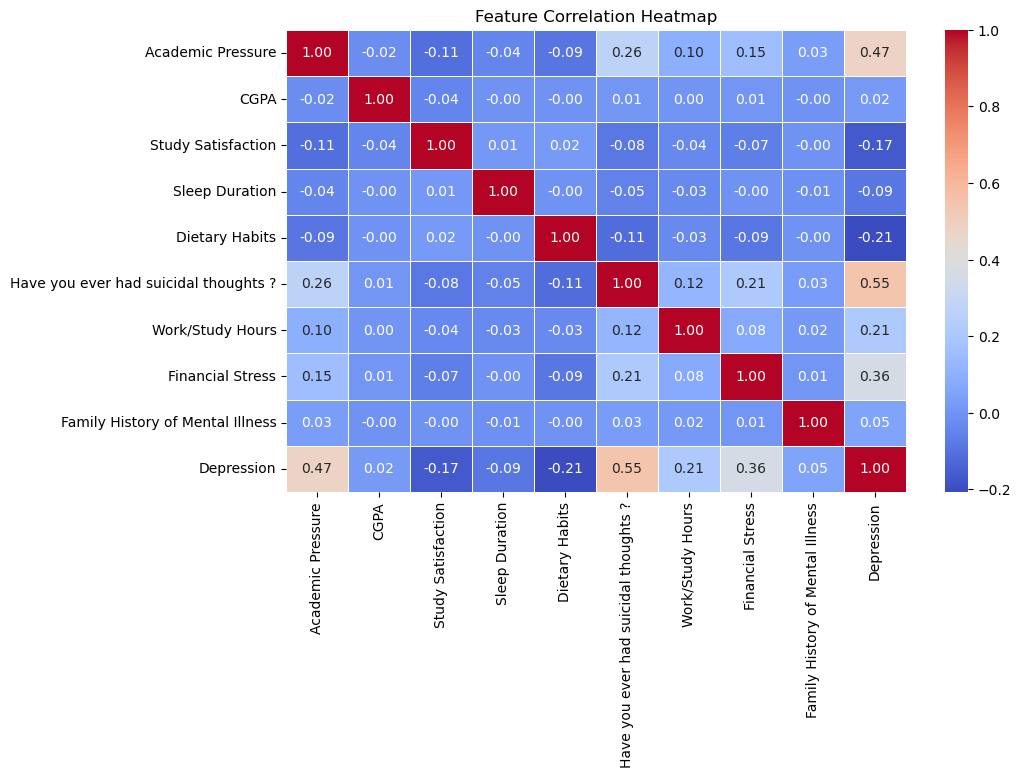

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


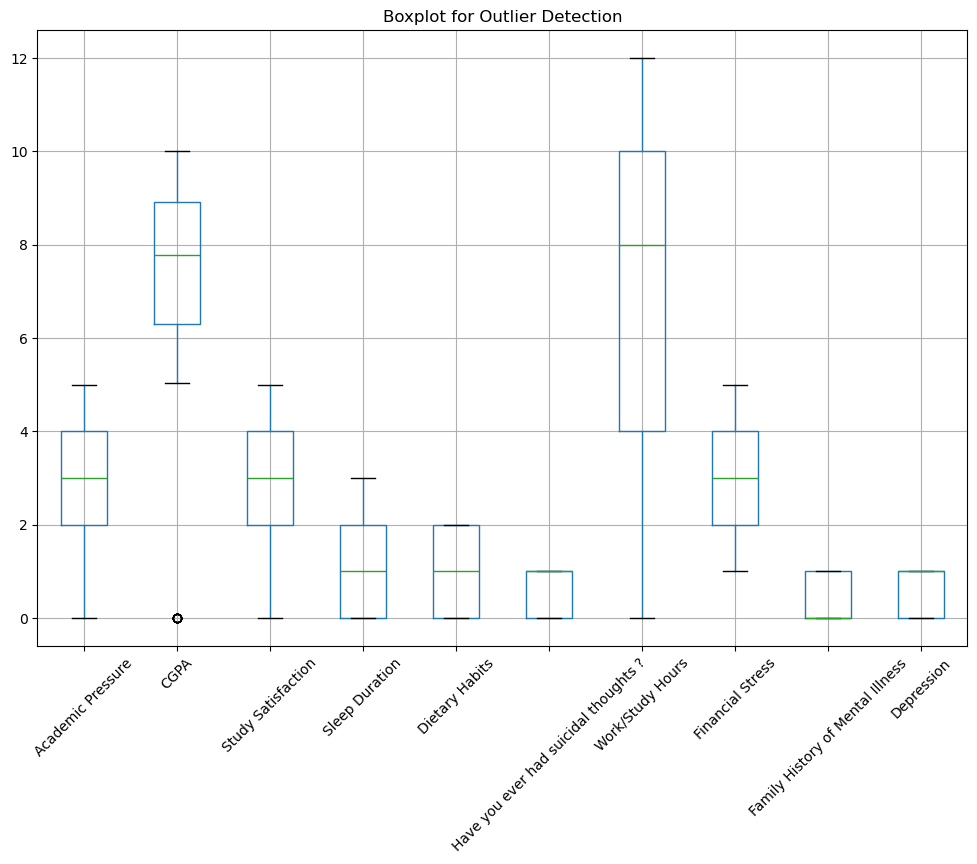

In [10]:
# Plot boxplots for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
df[numerical_features].boxplot(rot=45)  # Rotate x-axis labels for better visibility
plt.title("Boxplot for Outlier Detection")
plt.show()


In [11]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation values with 'Depression' in numerical format
correlation_with_depression = correlation_matrix['Depression'].sort_values(ascending=False)

# Print correlation values
print(correlation_with_depression)


Depression                               1.000000
Have you ever had suicidal thoughts ?    0.546277
Academic Pressure                        0.474835
Financial Stress                         0.363464
Work/Study Hours                         0.208563
Family History of Mental Illness         0.053430
CGPA                                     0.022210
Sleep Duration                          -0.086873
Study Satisfaction                      -0.167971
Dietary Habits                          -0.206689
Name: Depression, dtype: float64


In [12]:
print(df.isnull().sum())


Academic Pressure                         0
CGPA                                      0
Study Satisfaction                        0
Sleep Duration                            0
Dietary Habits                           12
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64


In [13]:
# Fill missing values in 'Dietary Habits' with the most common value (mode)
df['Dietary Habits'] = df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])

# Verify that missing values are removed
print(df.isnull().sum())  # Should print all zeros


Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Depression'])  # Features
y = df['Depression']                 # Target

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (22320, 9), Testing set: (5581, 9)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8362300662963627
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8254793047840888
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      2313
           1       0.84      0.87      0.85      3268

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.82      0.83      0.82      5581



In [17]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model without 'use_label_encoder'
xgb_model = XGBClassifier(eval_metric='logloss')  # Remove 'use_label_encoder=False'
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
from sklearn.metrics import accuracy_score, classification_report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8337215552768321
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      2313
           1       0.85      0.87      0.86      3268

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581



In [18]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'subsample': [0.7, 0.9, 1.0],  # Fraction of data used per tree
    'colsample_bytree': [0.7, 0.9, 1.0]  # Fraction of features per tree
}

# Initialize XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and accuracy
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

print("Best XGBoost Parameters:", best_params)
print("Best XGBoost Accuracy:", best_accuracy)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best XGBoost Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Best XGBoost Accuracy: 0.8394265232974911


In [19]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions
param_dist = {
    'n_estimators': np.arange(100, 301, 50),  # Randomly pick from 100 to 300 in steps of 50
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

# Random Search (tests only 15 random combos instead of all)
random_search = RandomizedSearchCV(XGBClassifier(eval_metric='logloss', random_state=42),
                                   param_distributions=param_dist, n_iter=15, scoring='accuracy',
                                   cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

# Get best parameters and accuracy
best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_accuracy = random_search.best_score_

print("Best XGBoost Parameters:", best_params)
print("Best XGBoost Accuracy:", best_accuracy)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best XGBoost Accuracy: 0.8390681003584229


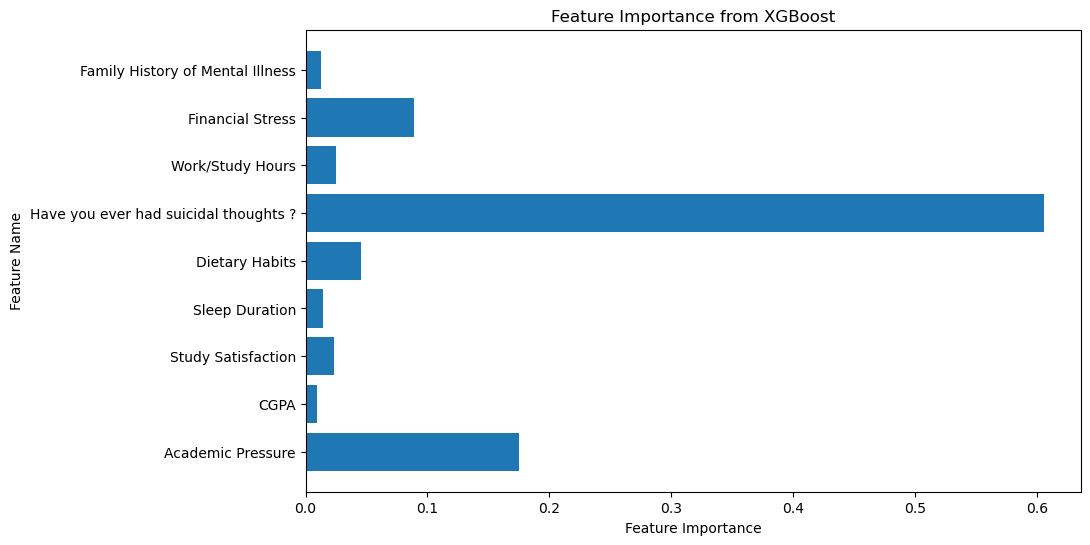

In [20]:


import matplotlib.pyplot as plt

# Train model on full data
best_model.fit(X_train, y_train)

# Get feature importance
feature_importances = best_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance from XGBoost")
plt.show()


In [21]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(**best_params))  # Use the best XGBoost parameters
]

# Define meta-model (Logistic Regression to combine predictions)
meta_model = LogisticRegression()

# Create Stacking Classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacked_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_stacked = stacked_model.predict(X_test)
stacked_accuracy = accuracy_score(y_test, y_pred_stacked)

print("Stacked Model Accuracy:", stacked_accuracy)


Stacked Model Accuracy: 0.8382010392402796


In [22]:
# Drop CGPA from features
X_train = X_train.drop(columns=['CGPA'])
X_test = X_test.drop(columns=['CGPA'])

# Retrain XGBoost with best parameters
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

# Evaluate new accuracy
y_pred_xgb_new = best_xgb.predict(X_test)
new_accuracy = accuracy_score(y_test, y_pred_xgb_new)

print("XGBoost Accuracy After Removing CGPA:", new_accuracy)


XGBoost Accuracy After Removing CGPA: 0.8362300662963627


In [23]:
# Retrain XGBoost with adjusted learning rate
best_xgb_tuned = XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.05,  # Reduced from 0.1
    max_depth=3,
    n_estimators=400,  # Increased from 300
    subsample=0.7,
    eval_metric='logloss',
    random_state=42
)

best_xgb_tuned.fit(X_train, y_train)

# Evaluate new accuracy
y_pred_xgb_tuned = best_xgb_tuned.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_xgb_tuned)

print("Tuned XGBoost Accuracy:", tuned_accuracy)


Tuned XGBoost Accuracy: 0.8401720121841963


In [40]:
import pandas as pd

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb_tuned})

# Display first 20 rows
print(comparison_df.head(20))


       Actual  Predicted
24708       1          1
15129       0          1
8135        1          1
13059       0          0
12229       1          1
1287        0          0
24068       0          1
7026        0          1
8649        0          0
22457       1          1
10708       1          1
8375        1          1
15157       1          1
24126       1          1
19303       1          1
22701       1          1
27205       1          1
15525       1          1
27544       0          0
19300       0          0


In [44]:
print(df['Depression'].value_counts(normalize=True) * 100)


Depression
1    58.549873
0    41.450127
Name: proportion, dtype: float64


In [47]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Retrain XGBoost with SMOTE-applied data
best_xgb_smote = XGBClassifier(**best_xgb_tuned.get_params())
best_xgb_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate new accuracy
y_pred_smote = best_xgb_smote.predict(X_test)
smote_accuracy = accuracy_score(y_test, y_pred_smote)

print("XGBoost Accuracy After SMOTE:", smote_accuracy)


XGBoost Accuracy After SMOTE: 0.839096936032969


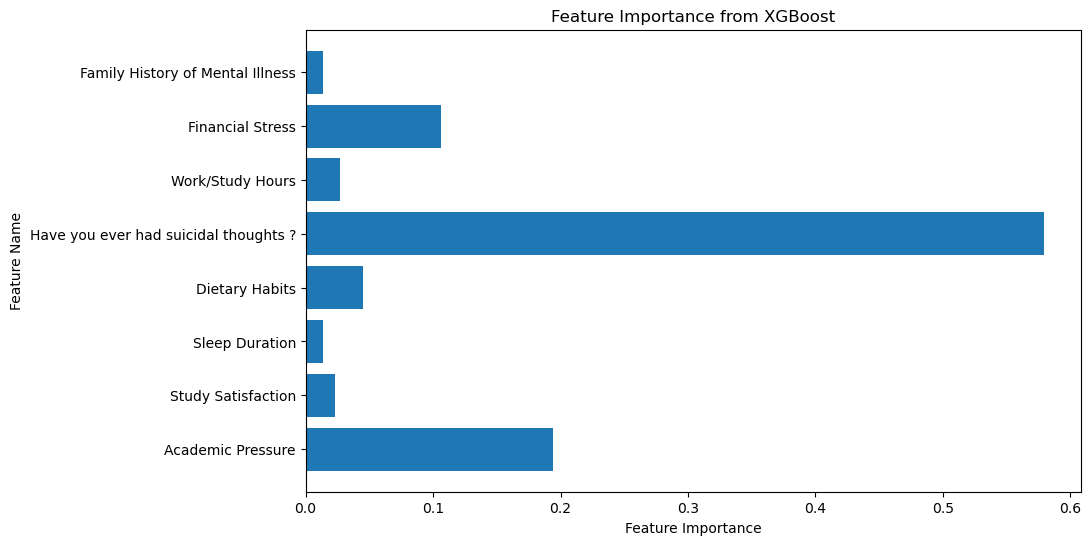

In [55]:
import matplotlib.pyplot as plt

# Train model and get feature importance
best_xgb_tuned.fit(X_train, y_train)
feature_importance = best_xgb_tuned.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance from XGBoost")
plt.show()


In [61]:
# Drop less important features
X_train_selected = X_train.drop(columns=['Family History of Mental Illness', 'Sleep Duration'])
X_test_selected = X_test.drop(columns=['Family History of Mental Illness', 'Sleep Duration'])

# Retrain XGBoost
best_xgb_selected = XGBClassifier(**best_xgb_tuned.get_params())
best_xgb_selected.fit(X_train_selected, y_train)

# Evaluate accuracy
y_pred_selected = best_xgb_selected.predict(X_test_selected)
selected_accuracy = accuracy_score(y_test, y_pred_selected)

print("XGBoost Accuracy After Feature Selection:", selected_accuracy)


XGBoost Accuracy After Feature Selection: 0.837484321806128


In [65]:
# Restore the dropped features
X_train_restored = X_train.copy()
X_test_restored = X_test.copy()

# Retrain XGBoost
best_xgb_restored = XGBClassifier(**best_xgb_tuned.get_params())
best_xgb_restored.fit(X_train_restored, y_train)

# Evaluate accuracy
y_pred_restored = best_xgb_restored.predict(X_test_restored)
restored_accuracy = accuracy_score(y_test, y_pred_restored)

print("XGBoost Accuracy After Restoring Features:", restored_accuracy)


XGBoost Accuracy After Restoring Features: 0.8401720121841963


In [67]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3],  # L2 regularization
    'gamma': [0, 0.1, 0.2, 0.3],  # Tree pruning
}

# Perform Grid Search
grid_search = GridSearchCV(XGBClassifier(**best_xgb_tuned.get_params()), param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_search.best_params_)
print("Best XGBoost Accuracy After Regularization Tuning:", grid_search.best_score_)


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best XGBoost Parameters: {'gamma': 0.1, 'reg_alpha': 0.1, 'reg_lambda': 2}
Best XGBoost Accuracy After Regularization Tuning: 0.8386200716845877


In [70]:
import joblib

# Define the file path to save the model
model_path = "F:/student_depression_xgb_model.pkl"

# Save the trained XGBoost model
joblib.dump(best_xgb_tuned, model_path)

print(f"Model saved successfully at: {model_path}")


Model saved successfully at: F:/student_depression_xgb_model.pkl


In [72]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}\n")


Academic Pressure: [5. 2. 3. 4. 1. 0.]

CGPA: [ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71    7.87
  5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09    9.82
  8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64    5.27
  6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88    5.32
  6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79    9.95
  5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81    6.03
  5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.75    6.16
  9.5     7.99    5.67    8.92    6.19    5.76    6.25    5.11    5.58
  5.65    9.89    8.03    6.61    9.41    8.64    7.21    8.28    6.04
  9.13    8.08    9.96    5.12 

In [74]:
import joblib

# Load the trained model
model_path = r"F:\student_depression\prediction\models\student_depression_xgb_model.pkl"
xgb_model = joblib.load(model_path)

# Get the number of features the model was trained on
num_features = xgb_model.n_features_in_

print(f"Number of Features Used for Training: {num_features}")


Number of Features Used for Training: 8


In [76]:
feature_names = xgb_model.feature_names_in_
print("Features Used for Training:", feature_names)


Features Used for Training: ['Academic Pressure' 'Study Satisfaction' 'Sleep Duration'
 'Dietary Habits' 'Have you ever had suicidal thoughts ?'
 'Work/Study Hours' 'Financial Stress' 'Family History of Mental Illness']


In [78]:
selected_features = [
    'Academic Pressure', 'Study Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Have you ever had suicidal thoughts ?',
    'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness'
]

for column in selected_features:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}\n")


Academic Pressure: [5. 2. 3. 4. 1. 0.]

Study Satisfaction: [2. 5. 3. 4. 1. 0.]

Sleep Duration: [1. 0. 2. 3.]

Dietary Habits: [2. 1. 0.]

Have you ever had suicidal thoughts ?: [1 0]

Work/Study Hours: [ 3.  9.  4.  1.  0. 12.  2. 11. 10.  6.  8.  5.  7.]

Financial Stress: [1. 2. 5. 3. 4.]

Family History of Mental Illness: [0 1]



In [80]:
import joblib
import xgboost as xgb

# Load the existing model
model_path = r"F:\student_depression\prediction\models\student_depression_xgb_model.pkl"
xgb_model = joblib.load(model_path)

# Save the model in XGBoost's native format
xgb_model.get_booster().save_model(r"F:\student_depression\prediction\models\student_depression_xgb_model.json")

print("Model re-saved in XGBoost format successfully!")


Model re-saved in XGBoost format successfully!
